In [76]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
activity = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [5]:
activity

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [6]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [7]:
activity['time_stamp2'] = pd.to_datetime(activity['time_stamp'])

In [8]:
activity

,time_stamp,user_id,visited,time_stamp2
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06 06:14:15
207913,2013-01-15 18:28:37,11997,1,2013-01-15 18:28:37
207914,2014-04-27 12:45:16,11998,1,2014-04-27 12:45:16
207915,2012-06-02 11:55:59,11999,1,2012-06-02 11:55:59


In [11]:
repeated_users_df = activity.groupby('user_id').filter(lambda x: len(x) >= 3)

In [10]:
repeated_users_df

,time_stamp,user_id,visited,time_stamp2
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04
...,...,...,...,...
207905,2014-04-20 14:22:45,11991,1,2014-04-20 14:22:45
207906,2014-04-25 14:22:45,11991,1,2014-04-25 14:22:45
207907,2014-04-28 14:22:45,11991,1,2014-04-28 14:22:45
207908,2014-05-17 14:22:45,11991,1,2014-05-17 14:22:45


In [12]:
grouped_users_df = repeated_users_df.groupby('user_id')

In [13]:
def active_users(period, days_logged, user):

    import pandas as pd
    from pandas import DataFrame, Series

    visited = len(user.index) #get the number of times the user logged in
    i, count = 0, 1
    active_user = False

    while count < days_logged:
        if (i+2) < visited: #needs to be at least 3 entries left
            if (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i]) > pd.Timedelta(days=1) :
                count += 1 #logged in twice within a 7 day period
                new_timeframe = (user['time_stamp2'].iloc[i + 1] - user['time_stamp2'].iloc[i])
                if (user['time_stamp2'].iloc[i + 2] - user['time_stamp2'].iloc[i + 1]) <= new_timeframe and (user['time_stamp2'].iloc[i + 2] - user['time_stamp2'].iloc[i + 1]) > pd.Timedelta(days=1):
                    active_user = True #they logged in three times within a 7 period window
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return active_user

In [15]:
active_peeps = grouped_users_df.filter(lambda x: active_users(period=7, days_logged=3, user=x) ==True)
unique_active_peeps_df = DataFrame(Series.unique(active_peeps['user_id']))
unique_active_peeps_df.columns = ['user_id']

In [16]:
unique_active_peeps_df

,user_id
0,2
1,10
2,33
3,42
4,50
...,...
1610,11969
1611,11975
1612,11980
1613,11988


In [17]:
unique_active_peeps_df['adopted_user'] = 1

In [18]:
unique_active_peeps_df

,user_id,adopted_user
0,2,1
1,10,1
2,33,1
3,42,1
4,50,1
...,...,...
1610,11969,1
1611,11975,1
1612,11980,1
1613,11988,1


In [19]:
adopted_user_info = pd.merge(unique_active_peeps_df, users, how='outer',left_on='user_id', right_on='object_id')

In [20]:
adopted_user_info['adopted_user'] = adopted_user_info['adopted_user'].fillna(0)

In [21]:
adopted_user_info

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [23]:
temp = adopted_user_info
temp['creation_time_utc'] = pd.to_datetime(temp['creation_time'], utc=1)
temp['creation_time_unix'] = temp['creation_time_utc'].astype(np.int64)

In [24]:
temp

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_utc,creation_time_unix
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04+00:00,1384487104000000000
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-16 22:08:03+00:00,1358374083000000000
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,2014-03-11 06:29:09+00:00,1394519349000000000
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,2012-11-11 19:05:07+00:00,1352660707000000000
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,2012-06-03 11:02:08+00:00,1338721328000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15+00:00,1378448055000000000
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-10 18:28:37+00:00,1357842517000000000
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16+00:00,1398602716000000000
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-05-31 11:55:59+00:00,1338465359000000000


In [25]:
# Time from account creation to last login
temp['creation_delta'] = temp['last_session_creation_time'] - temp['creation_time_unix']

In [26]:
# Time from account creation to today
temp['lifespan_delta'] = int(time.time()) - temp['creation_time_unix']

In [27]:
temp['last_login_delta'] = int(time.time()) - temp['last_session_creation_time']

In [28]:
temp

,user_id,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_utc,creation_time_unix,creation_delta,lifespan_delta,last_login_delta
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04+00:00,1384487104000000000,-1.384487e+18,-1384487102363122416,240640095.0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-16 22:08:03+00:00,1358374083000000000,-1.358374e+18,-1358374081363122416,235044316.0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,2014-03-11 06:29:09+00:00,1394519349000000000,-1.394519e+18,-1394519347363122416,235359850.0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,2012-11-11 19:05:07+00:00,1352660707000000000,-1.352661e+18,-1352660705363122416,235832892.0
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,2012-06-03 11:02:08+00:00,1338721328000000000,-1.338721e+18,-1338721326363122416,285887471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15+00:00,1378448055000000000,-1.378448e+18,-1378448053363122416,258429544.0
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-10 18:28:37+00:00,1357842517000000000,-1.357843e+18,-1357842515363122416,278603082.0
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16+00:00,1398602716000000000,-1.398603e+18,-1398602714363122416,238274883.0
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-05-31 11:55:59+00:00,1338465359000000000,-1.338465e+18,-1338465357363122416,298239440.0


In [29]:
temp['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [33]:
column = ['creation_source']
tempdf = pd.get_dummies(temp[column], prefix=column)
temp = pd.merge(left=temp,right=tempdf,left_index=True,right_index=True)
temp = temp.drop(columns=column)

In [34]:
temp

,user_id,adopted_user,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,...,creation_time_utc,creation_time_unix,creation_delta,lifespan_delta,last_login_delta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,...,2013-11-15 03:45:04+00:00,1384487104000000000,-1.384487e+18,-1384487102363122416,240640095.0,0,1,0,0,0
1,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,1,1,318,...,2013-01-16 22:08:03+00:00,1358374083000000000,-1.358374e+18,-1358374081363122416,235044316.0,0,1,0,0,0
2,33.0,1.0,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,1.401518e+09,0,0,401,...,2014-03-11 06:29:09+00:00,1394519349000000000,-1.394519e+18,-1394519347363122416,235359850.0,1,0,0,0,0
3,42.0,1.0,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,1.401045e+09,1,0,235,...,2012-11-11 19:05:07+00:00,1352660707000000000,-1.352661e+18,-1352660705363122416,235832892.0,0,0,0,1,0
4,50.0,1.0,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,1.350990e+09,0,0,61,...,2012-06-03 11:02:08+00:00,1338721328000000000,-1.338721e+18,-1338721326363122416,285887471.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1.378448e+09,0,0,89,...,2013-09-06 06:14:15+00:00,1378448055000000000,-1.378448e+18,-1378448053363122416,258429544.0,0,1,0,0,0
11996,NaN,0.0,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,1.358275e+09,0,0,200,...,2013-01-10 18:28:37+00:00,1357842517000000000,-1.357843e+18,-1357842515363122416,278603082.0,0,0,0,0,1
11997,NaN,0.0,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,1.398603e+09,1,1,83,...,2014-04-27 12:45:16+00:00,1398602716000000000,-1.398603e+18,-1398602714363122416,238274883.0,1,0,0,0,0
11998,NaN,0.0,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,1.338638e+09,0,0,6,...,2012-05-31 11:55:59+00:00,1338465359000000000,-1.338465e+18,-1338465357363122416,298239440.0,0,0,1,0,0


In [51]:
temp.fillna(temp['creation_delta'].mean(),inplace = True)

In [52]:
x = temp[['creation_delta','lifespan_delta','last_login_delta','opted_in_to_mailing_list','enabled_for_marketing_drip','creation_source_GUEST_INVITE','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH']]
y = temp['adopted_user']

In [53]:
x.isnull().sum()

creation_delta                        0
lifespan_delta                        0
last_login_delta                      0
opted_in_to_mailing_list              0
enabled_for_marketing_drip            0
creation_source_GUEST_INVITE          0
creation_source_ORG_INVITE            0
creation_source_PERSONAL_PROJECTS     0
creation_source_SIGNUP                0
creation_source_SIGNUP_GOOGLE_AUTH    0
dtype: int64

-1.3741625108495516e+18

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [61]:
model = LogisticRegression(max_iter=500,solver='lbfgs')
model.fit(x_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [66]:
model.fit(x_train / np.std(x_train, 0), y_train)
print(model.coef_)

[[ 3.16540154e-01 -9.43782448e-02  2.67688228e+00  1.84522504e-03
   2.21785360e-02  1.30345200e-01 -3.02894789e-02  5.91162257e-02
  -9.57089436e-02 -2.66323164e-02]]


In [69]:
w0 = model.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 = model.coef_[0]

In [94]:
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4) + (%f * x5) + (%f * x6) + (%f * x7) + (%f * x8) + (%f * x9) + (%f * x10)" % (w0, w1, w2, w3, w4,w5, w6, w7, w8, w9, w10)
print(equation)

y = 18.647811 + (0.316540 * x1) + (-0.094378 * x2) + (2.676882 * x3) + (0.001845 * x4) + (0.022179 * x5) + (0.130345 * x6) + (-0.030289 * x7) + (0.059116 * x8) + (-0.095709 * x9) + (-0.026632 * x10)


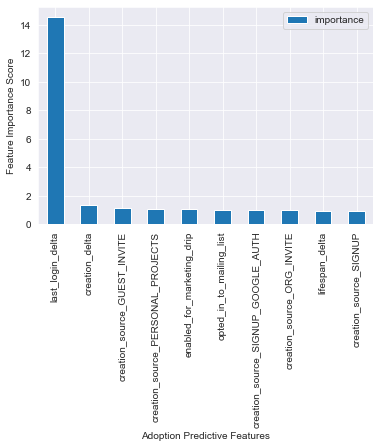

In [87]:
feature_importance = pd.DataFrame(x.columns, columns =['Features'])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
sns.set_style("darkgrid")
ax = feature_importance.plot.bar(x='Features', y='importance')
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.show()


In [88]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.26%


In [90]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(x_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

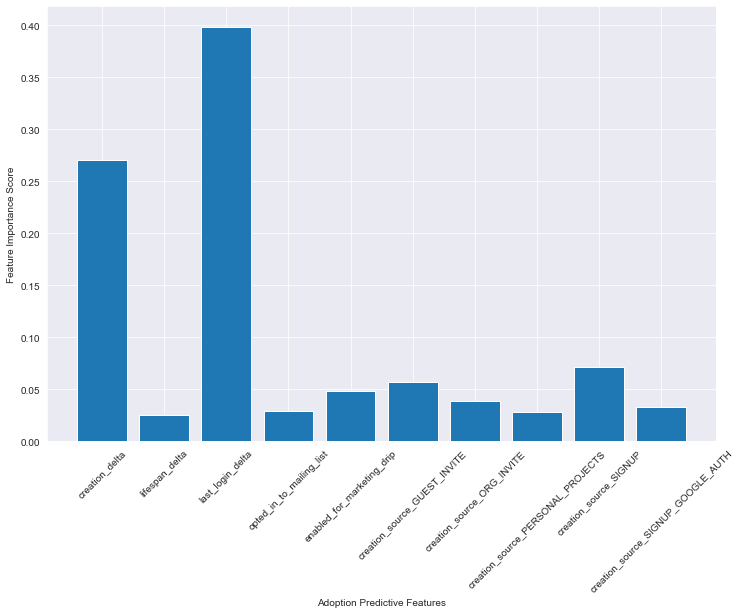

In [92]:
feat_imp = model1.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
xcol = x.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()

In [93]:
y_pred1 = model1.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.26%


We see above that the XGBClassifier and Logistic Regression model does a good job in predicting whether a user will be an adopted user in the future and that the two most important features to determine adoption are the last login times of a user and the creation delta.